In [1]:
# Import modules
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression

import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


# Load dataset
digits = datasets.load_digits()

In [4]:
# Create data and label arrays
X = digits.data
y = digits.target

# Split into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4)

In [3]:
df = pd.DataFrame(columns = 'train test'.split())
for i in range(1,8):
    kNN = KNeighborsClassifier(n_neighbors=i)
    kNN.fit(X_train, y_train)
    tr = kNN.score(X_train,y_train)
    te = kNN.score(X_test,y_test)
    df.loc[i] = [tr, te]
df

/Users/saikatduttatanu/Desktop/ANACONDA/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/saikatduttatanu/Desktop/ANACONDA/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be e

,train,test
1,1.000000,0.988889
2,0.991649,0.988889
3,0.990953,0.997222
4,0.989562,0.988889
5,0.986778,0.991667
6,0.986082,0.988889
7,0.988866,0.986111


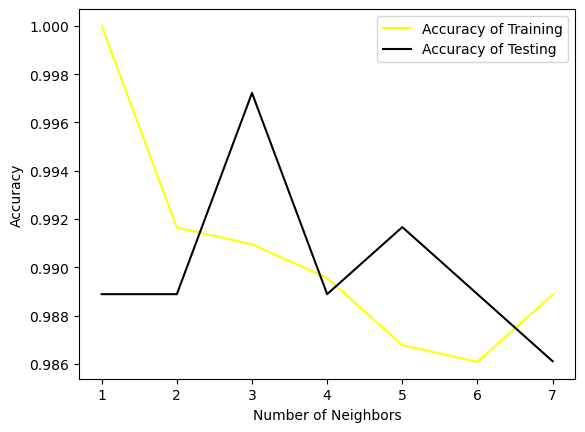

In [5]:
#plot graph of train and test
plt.plot(df['train'],color = 'yellow', label = 'Accuracy of Training')
plt.plot(df['test'],color = 'black', label = 'Accuracy of Testing')
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.legend()

In [6]:
svm = SVC(kernel='linear')
svm.fit(X_train,y_train)
y_pred = svm.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99        75
           1       0.97      0.97      0.97        78
           2       0.99      1.00      0.99        71
           3       1.00      0.99      0.99        70
           4       0.93      1.00      0.96        65
           5       0.99      0.97      0.98        71
           6       1.00      0.97      0.99        79
           7       1.00      0.98      0.99        82
           8       0.97      0.94      0.95        63
           9       0.93      0.97      0.95        65

    accuracy                           0.98       719
   macro avg       0.98      0.98      0.98       719
weighted avg       0.98      0.98      0.98       719



In [7]:
svm = SVC(kernel='poly')
svm.fit(X_train,y_train)
y_pred = svm.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99        75
           1       0.99      1.00      0.99        78
           2       0.99      1.00      0.99        71
           3       1.00      0.99      0.99        70
           4       0.98      1.00      0.99        65
           5       0.99      0.97      0.98        71
           6       1.00      0.99      0.99        79
           7       1.00      0.99      0.99        82
           8       0.98      1.00      0.99        63
           9       0.95      0.97      0.96        65

    accuracy                           0.99       719
   macro avg       0.99      0.99      0.99       719
weighted avg       0.99      0.99      0.99       719



In [8]:
svm = SVC(kernel='rbf')
svm.fit(X_train,y_train)
y_pred = svm.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       1.00      0.99      0.99        75
           1       0.96      1.00      0.98        78
           2       0.99      1.00      0.99        71
           3       1.00      0.99      0.99        70
           4       0.98      1.00      0.99        65
           5       0.99      0.97      0.98        71
           6       1.00      1.00      1.00        79
           7       0.99      0.99      0.99        82
           8       1.00      0.97      0.98        63
           9       0.95      0.95      0.95        65

    accuracy                           0.99       719
   macro avg       0.99      0.99      0.99       719
weighted avg       0.99      0.99      0.99       719



<AxesSubplot:>

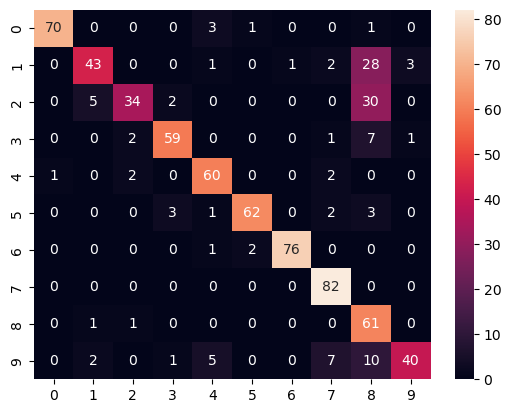

In [9]:
bayes = GaussianNB()
bayes.fit(X_train, y_train)
y_pred = bayes.predict(X_test)
conf_matrix = confusion_matrix(y_test,y_pred)
sns.heatmap(conf_matrix, annot= True)

/Users/saikatduttatanu/Desktop/ANACONDA/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


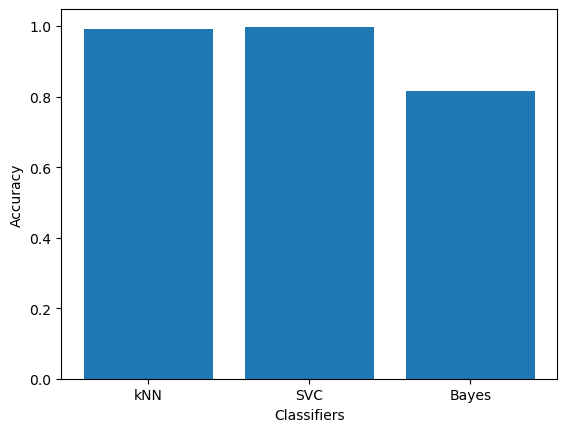

In [10]:
kNN = KNeighborsClassifier(n_neighbors=3)
kNN.fit(X_train, y_train)
a = kNN.score(X_train,y_train)

svm = SVC(kernel='poly')
svm.fit(X_train,y_train)
b = svm.score(X_train,y_train)

bayes = GaussianNB()
bayes.fit(X_train, y_train)
c = bayes.score(X_train,y_train)

d = np.array(["kNN", "SVC", "Bayes"])
e = np.array([a,b,c])

plt.bar(d,e)
plt.xlabel("Classifiers")
plt.ylabel("Accuracy")
plt.show()

In [12]:
df = pd.read_csv("/Users/saikatduttatanu/Desktop/TRIMESTER 1, 2023/Data Analytics/gapminder.csv")
df.head()

,population,fertility,HIV,CO2,BMI_male,GDP,BMI_female,life,child_mortality,Region
0,34811059,2.73,0.1,3.328945,24.59620,12314,129.9049,75.3,29.5,Middle East & North Africa
1,19842251,6.43,2.0,1.474353,22.25083,7103,130.1247,58.3,192.0,Sub-Saharan Africa
2,40381860,2.24,0.5,4.785170,27.50170,14646,118.8915,75.5,15.4,America
3,2975029,1.40,0.1,1.804106,25.35542,7383,132.8108,72.5,20.0,Europe & Central Asia
4,21370348,1.96,0.1,18.016313,27.56373,41312,117.3755,81.5,5.2,East Asia & Pacific


<AxesSubplot:>

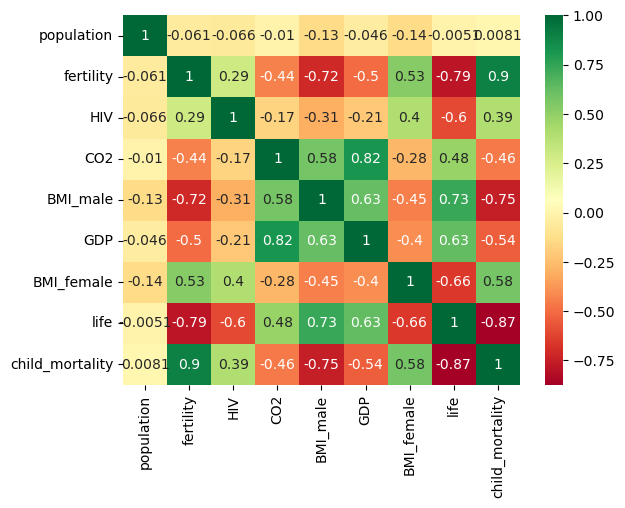

In [13]:
sns.heatmap(df.corr(), cmap = "RdYlGn", annot=True)

0.6192442167740035


/var/folders/sl/4pwtl8ws3psb02vg3snwbjd40000gn/T/ipykernel_89987/4038681955.py:6: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  regression.fit(x[:, None], y)
/var/folders/sl/4pwtl8ws3psb02vg3snwbjd40000gn/T/ipykernel_89987/4038681955.py:7: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  print(regression.score(x[:, None], y))
/var/folders/sl/4pwtl8ws3psb02vg3snwbjd40000gn/T/ipykernel_89987/4038681955.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  fig, ax = plt.plot(x, y, 'bo', x, regression.predict(x[:, None]), '-k')


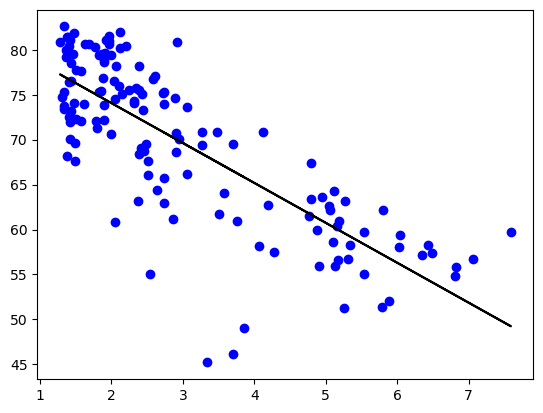

In [14]:
# Linear Regression
x = df["fertility"]
y = df["life"]

regression = LinearRegression()
regression.fit(x[:, None], y)
print(regression.score(x[:, None], y))

fig, ax = plt.plot(x, y, 'bo', x, regression.predict(x[:, None]), '-k')

In [15]:
#5 fold cross-validation 
cross_val_score(regression, x[:,None], y, cv=5)

/var/folders/sl/4pwtl8ws3psb02vg3snwbjd40000gn/T/ipykernel_89987/3833724394.py:2: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  cross_val_score(regression, x[:,None], y, cv=5)


array([0.71001079, 0.75007717, 0.55271526, 0.547501  , 0.52410561])

0.8974995317332959


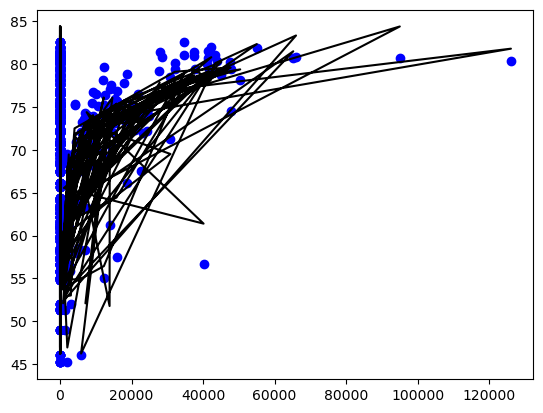

In [16]:
# Linear Regression with all features
x = df[["fertility","HIV","CO2","BMI_male","GDP","BMI_female","child_mortality"]]
y = df["life"]

regression1 = LinearRegression()
regression1.fit(x, y)
print(regression1.score(x, y))

plt.plot(x, y, 'bo', x, regression1.predict(x),'-k')
plt.show()

In [17]:
#5 fold cross-validation

cross_val_score(regression1, x, y, cv=5)

array([0.81621881, 0.8322471 , 0.90868335, 0.81325568, 0.94404223])

In [18]:
#Compare the above linear regressions.
# II 2. Credit card
df1 = pd.read_csv("/Users/saikatduttatanu/Desktop/TRIMESTER 1, 2023/Data Analytics/creditcard.csv")
print(df1.shape)
df1.head()

(284807, 31)


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


/Users/saikatduttatanu/Desktop/ANACONDA/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


<AxesSubplot:>

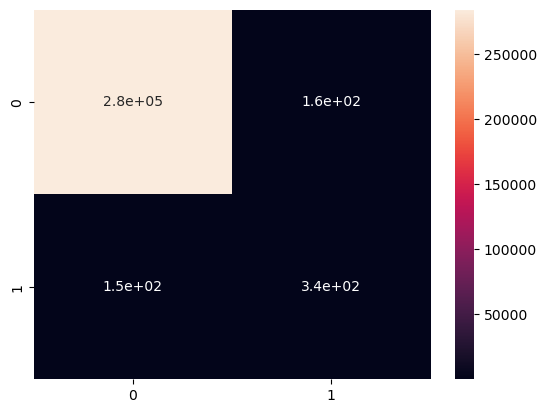

In [19]:
# Logistic Regression
X = df1.drop("Class",axis = 1)
y = df1.Class

log_regression = LogisticRegression()
log_regression.fit(X, y)
y_pred = log_regression.predict(X)
conf_matrix = confusion_matrix(y, y_pred)

sns.heatmap(conf_matrix, annot=True)